# 02_pm_contig_vs_vmag_gtdb

## Load packages and data

In [1]:
# load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings

# global options
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# load functions
def count_classified(df, level):
    level_prefix = level[0] + '__'
    subdf = df[(df[level] != 'Unclassified') & (~df[level].isna()) & (df[level] != '') & (df[level] != level_prefix)]
    return len(subdf)

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# load proximeta master table
proximeta_master = pd.read_csv(op.join(path,'tables/proximeta_master.csv'))

# subset all observations with a classified host
proximeta_hosts = proximeta_master[(proximeta_master['classification'].notna()) & (proximeta_master['classification'] != 'Unclassified Bacteria') & (proximeta_master['classification'] != 'Unclassified')]

# create a dataframe for just contigs
contig_hosts = proximeta_hosts[proximeta_hosts['virus_type'] == 'contig']

# create a dataframe for just vmags
vmag_hosts = proximeta_hosts[proximeta_hosts['virus_type'] == 'vmag']


## How many cells were classified to at least each level?

There are 153 cells annotated to domain .
There are 152 cells annotated to phyla .
There are 152 cells annotated to class .
There are 152 cells annotated to order .
There are 152 cells annotated to family .
There are 128 cells annotated to genus .
There are 100 cells annotated to species .
  tax_level  num_cells_classified  percent_classified    type
0    domain                   153          100.000000  Contig
1     phyla                   152           99.346405  Contig
2     class                   152           99.346405  Contig
3     order                   152           99.346405  Contig
4    family                   152           99.346405  Contig
5     genus                   128           83.660131  Contig
6   species                   100           65.359477  Contig


Text(0.5, 1.0, 'Percent of Cells with Viral Contigs Classified with GTDB')

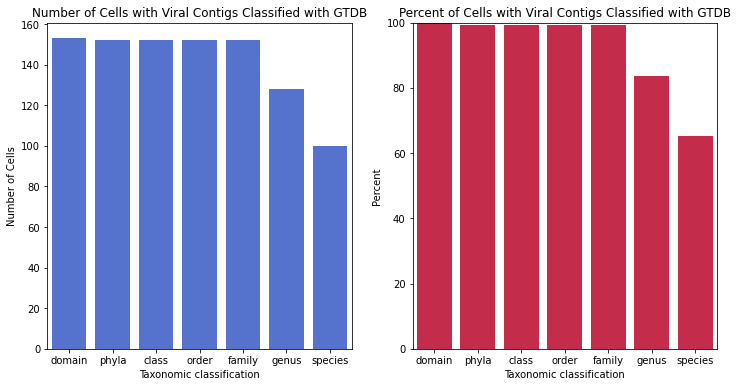

In [2]:
''' contigs '''

contig_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    contig_lcount = count_classified(contig_hosts, level)
    print('There are', contig_lcount, 'cells annotated to', level,".") 
    contig_level_counts.append(contig_lcount)

# create a dictionary with the number classified for each level
contig_tax_dict = {'tax_level': levels, 'num_cells_classified': contig_level_counts} 

# create a dataframe from the dictionary
contig_tax_df = pd.DataFrame(data = contig_tax_dict)

# calculate total number of cells classified
contig_tot = len(contig_hosts)

# add an percent column
contig_tax_df['percent_classified'] = contig_tax_df['num_cells_classified']/contig_tot*100

# add a type column
contig_tax_df['type'] = 'Contig'

print(contig_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = contig_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Number of Cells with Viral Contigs Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = contig_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_ylim(0,100)
axes[1].set_title('Percent of Cells with Viral Contigs Classified with GTDB')

This figure shows the number of cells with viral contigs classified in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the cells with viral contigs and classified hosts, the majority of them were classfied down to the species level. 

There are 14 cells annotated to domain .
There are 14 cells annotated to phyla .
There are 14 cells annotated to class .
There are 14 cells annotated to order .
There are 14 cells annotated to family .
There are 12 cells annotated to genus .
There are 10 cells annotated to species .
  tax_level  num_cells_classified  percent_classified  type
0    domain                    14          100.000000  vmag
1     phyla                    14          100.000000  vmag
2     class                    14          100.000000  vmag
3     order                    14          100.000000  vmag
4    family                    14          100.000000  vmag
5     genus                    12           85.714286  vmag
6   species                    10           71.428571  vmag


Text(0.5, 1.0, 'Percent of vmags Classified with GTDB')

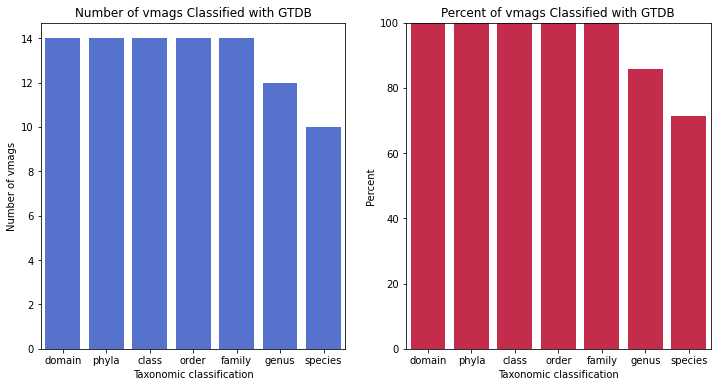

In [3]:
''' vmags '''

vmag_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    vmag_lcount = count_classified(vmag_hosts, level)
    print('There are', vmag_lcount, 'cells annotated to', level,".") 
    vmag_level_counts.append(vmag_lcount)

# create a dictionary with the number classified for each level
vmag_tax_dict = {'tax_level': levels, 'num_cells_classified': vmag_level_counts} 

# create a dataframe from the dictionary
vmag_tax_df = pd.DataFrame(data = vmag_tax_dict)

# calculate total number of cells classified
vmag_tot = len(vmag_hosts)

# add an percent column
vmag_tax_df['percent_classified'] = vmag_tax_df['num_cells_classified']/vmag_tot*100

# add a type column
vmag_tax_df['type'] = 'vmag'

print(vmag_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = vmag_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of vmags')
axes[0].set_title('Number of vmags Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = vmag_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_ylim(0,100)
axes[1].set_title('Percent of vmags Classified with GTDB')

This figure shows the number of cells with vmags classified in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the cells with vmags and classified hosts, the majority of them were classfied down to the species level. 

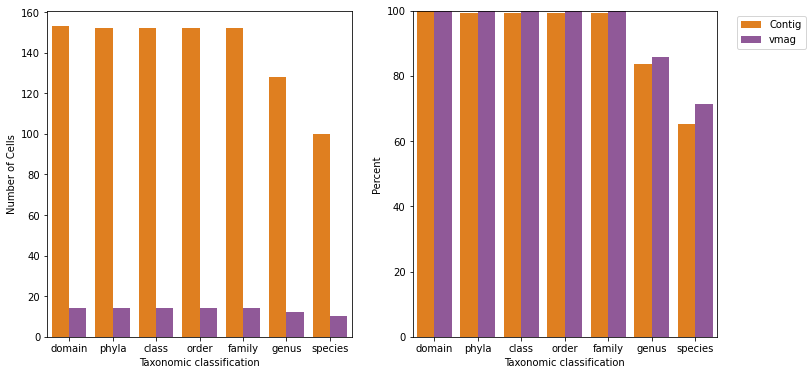

In [34]:
classified_plot = pd.concat([contig_tax_df,vmag_tax_df])

custom_palette = {'vmag': '#984ea3', 'Contig': '#ff7f00'}

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = classified_plot, palette=custom_palette, hue='type', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].get_legend().remove()

sns.barplot(x = 'tax_level', y= 'percent_classified', data = classified_plot, palette=custom_palette, hue='type', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_ylim(0,100)
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

This figure shows the number of cells with both viral contigs and vmags classified to each level. Raw counts are on the left and percents are on the right. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the y-axis. Orange bars represent cells with viral contigs and purple bars represent cells with vmags.

Even though there are a higher number of contigs with classified hosts, there is a higher percentage of vmags with classified hosts. This is very slight for domain, phyla, class, order, and family; however, becomes more apparent in genus and species.

## Most Abundant Classifications

Contig Top Phylum: ['Planctomycetota', 'Pseudomonadota', 'Acidobacteriota', 'Cyanobacteriota', 'Patescibacteria', 'Verrucomicrobiota', 'Actinomycetota', 'Myxococcota_A', 'Nitrospinota', 'Armatimonadota']
----------------------------------------------------------------------------------------------------
Contig Top Classes: ['Planctomycetia', 'Gammaproteobacteria', 'Cyanobacteriia', 'Vicinamibacteria', 'Verrucomicrobiae', 'Acidimicrobiia', 'UBA9160', 'Paceibacteria', 'CAJXCL01', 'Alphaproteobacteria']
----------------------------------------------------------------------------------------------------
Contig Top Orders: ['Pirellulales', 'Arenicellales', 'PCC-6307', 'Vicinamibacterales', 'Verrucomicrobiales', 'UBA9160', 'Acidimicrobiales', 'UBA9983_A', 'CAJXCL01', 'UBA5377']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

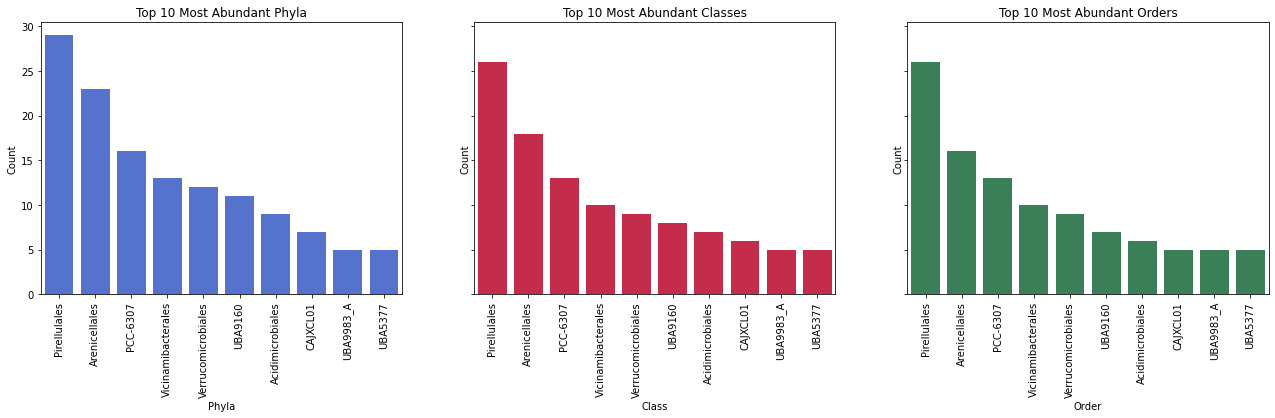

In [5]:
''' contigs '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
contig_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    contig_most_common = contig_hosts[column].value_counts().head(10).index.tolist()
    contig_top_dict[column] = contig_most_common

# create a list using the corresponding column of the mag_top_dict
contig_phyla_list = contig_top_dict['phyla']
contig_class_list = contig_top_dict['class']
contig_order_list = contig_top_dict['order']

print('Contig Top Phylum:', contig_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('Contig Top Classes:', contig_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('Contig Top Orders:', contig_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
contig_phyla_df = contig_hosts[contig_hosts['phyla'].isin(contig_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
contig_class_df = contig_hosts[contig_hosts['class'].isin(contig_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
contig_order_df = contig_hosts[contig_hosts['order'].isin(contig_order_list)]

contig_phyla_plot = pd.DataFrame(contig_phyla_df['phyla'].value_counts())
contig_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
contig_phyla_plot['phyla'] = contig_phyla_plot.index

contig_class_plot = pd.DataFrame(contig_class_df['class'].value_counts())
contig_class_plot.rename(columns={'class':'count'},inplace=True)
contig_class_plot['class'] = contig_class_plot.index

contig_order_plot = pd.DataFrame(contig_order_df['order'].value_counts())
contig_order_plot.rename(columns={'order':'count'},inplace=True)
contig_order_plot['order'] = contig_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = contig_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = contig_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = contig_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the proximeta cells with viral contigs. Each classification is on the x-axis and count is on the y-axis.

vmag Top Phylum: ['Planctomycetota', 'Pseudomonadota', 'Verrucomicrobiota', 'Cyanobacteriota', 'Armatimonadota', 'Chloroflexota']
----------------------------------------------------------------------------------------------------
vmag Top Classes: ['Planctomycetia', 'Alphaproteobacteria', 'Gammaproteobacteria', 'Verrucomicrobiae', 'Cyanobacteriia', 'Brocadiia', 'UBA5377', 'Anaerolineae']
----------------------------------------------------------------------------------------------------
vmag Top Orders: ['Pirellulales', 'Pseudomonadales', 'Caulobacterales', 'Verrucomicrobiales', 'PCC-6307', 'Brocadiales', 'UBA5377', 'Anaerolineales', 'GCA-2731375']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

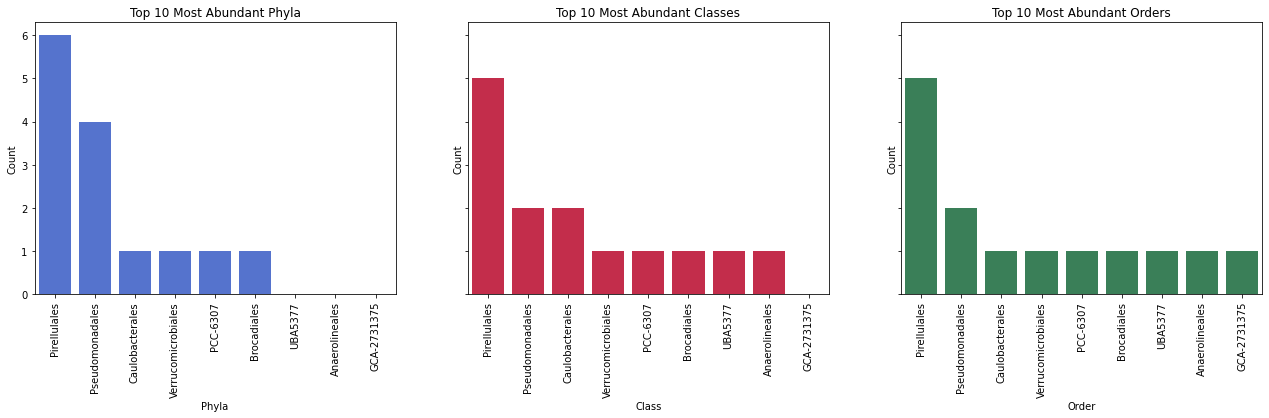

In [6]:
''' vmags '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
vmag_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    vmag_most_common = vmag_hosts[column].value_counts().head(10).index.tolist()
    vmag_top_dict[column] = vmag_most_common

# create a list using the corresponding column of the mag_top_dict
vmag_phyla_list = vmag_top_dict['phyla']
vmag_class_list = vmag_top_dict['class']
vmag_order_list = vmag_top_dict['order']

print('vmag Top Phylum:', vmag_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('vmag Top Classes:', vmag_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('vmag Top Orders:', vmag_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
vmag_phyla_df = vmag_hosts[vmag_hosts['phyla'].isin(vmag_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
vmag_class_df = vmag_hosts[vmag_hosts['class'].isin(vmag_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
vmag_order_df = vmag_hosts[vmag_hosts['order'].isin(vmag_order_list)]

vmag_phyla_plot = pd.DataFrame(vmag_phyla_df['phyla'].value_counts())
vmag_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
vmag_phyla_plot['phyla'] = vmag_phyla_plot.index

vmag_class_plot = pd.DataFrame(vmag_class_df['class'].value_counts())
vmag_class_plot.rename(columns={'class':'count'},inplace=True)
vmag_class_plot['class'] = vmag_class_plot.index

vmag_order_plot = pd.DataFrame(vmag_order_df['order'].value_counts())
vmag_order_plot.rename(columns={'order':'count'},inplace=True)
vmag_order_plot['order'] = vmag_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = vmag_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = vmag_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = vmag_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the proximeta cells with vmags. Each classification is on the x-axis and count is on the y-axis.

contig/vmag phylum in common ['Armatimonadota', 'Cyanobacteriota', 'Planctomycetota', 'Verrucomicrobiota', 'Pseudomonadota']
----------------------------------------------------------------------------------------------------
contig/vmag classes in common ['Planctomycetia', 'Alphaproteobacteria', 'Gammaproteobacteria', 'Cyanobacteriia', 'Verrucomicrobiae']
----------------------------------------------------------------------------------------------------
contig/vmag orders in common ['PCC-6307', 'UBA5377', 'Pirellulales', 'Verrucomicrobiales']


Text(0.5, 1.0, 'Common Most Abundant Orders')

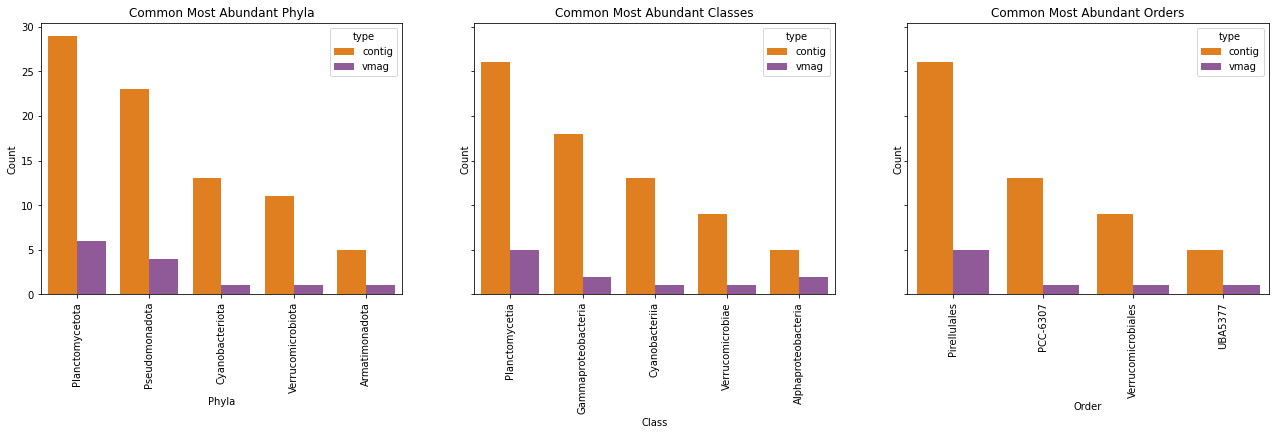

In [37]:
# compare classifications

common_phyla_list = list(set(contig_phyla_list) & set(vmag_phyla_list))
common_class_list = list(set(contig_class_list) & set(vmag_class_list))
common_order_list = list(set(contig_order_list) & set(vmag_order_list))

print('contig/vmag phylum in common', common_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('contig/vmag classes in common', common_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('contig/vmag orders in common',common_order_list)

contig_common_phyla = contig_phyla_plot[contig_phyla_plot['phyla'].isin(common_phyla_list)]
contig_common_class = contig_class_plot[contig_class_plot['class'].isin(common_class_list)]
contig_common_order = contig_order_plot[contig_order_plot['order'].isin(common_order_list)]

vmag_common_phyla = vmag_phyla_plot[vmag_phyla_plot['phyla'].isin(common_phyla_list)]
vmag_common_class = vmag_class_plot[vmag_class_plot['class'].isin(common_class_list)]
vmag_common_order = vmag_order_plot[vmag_order_plot['order'].isin(common_order_list)]

for df in list([contig_common_phyla, contig_common_class, contig_common_order]):
    df['type'] = 'contig'
    
for df in list([vmag_common_phyla, vmag_common_class, vmag_common_order]):
    df['type'] = 'vmag'
    
common_phyla_plot = pd.concat([contig_common_phyla, vmag_common_phyla])
common_class_plot = pd.concat([contig_common_class, vmag_common_class])
common_order_plot = pd.concat([contig_common_order, vmag_common_order])


# plot abundances for common classifications

custom_palette = {'vmag': '#984ea3', 'contig': '#ff7f00'}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = common_phyla_plot, hue='type', palette=custom_palette, ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Common Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = common_class_plot, hue='type', palette=custom_palette, ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Common Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = common_order_plot, hue='type', palette=custom_palette, ax = axes[2])

axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Common Most Abundant Orders')

There are 5 phyla, 5 classes, and 4 orders that are commmon between the top 10 most abundant taxonomic levels of cells with viral contigs and vmags. The 5 common phyla are Armatimonadota, Cyanobacteriota, Planctomycetota, Verrucomicrobiota, and Pseudomonadota.The 5 common classes are  Planctomycetia, Alphaproteobacteria, Gammaproteobacteria, Cyanobacteriia, and Verrucomicrobiae. Finally, the 4 common orders are PCC-6307, UBA5377, Pirellulales, and Verrucomicrobiales.

This figure shows the raw abundances of these phyla (left), classes (middle), and orders (right). Cells with viral contigs are represented with orange bars and cells with vmags are represented by purple bars. Each phyla, class, or order respectively are on the x-axis and count is on the y-axis of these 3 plots.

All phyla, classes, and orders have considerably more cells with viral contigs than vmags. This is due to there being a much higher abundance of viral contigs than vmags in the entire dataset.

### Plot Tax Level

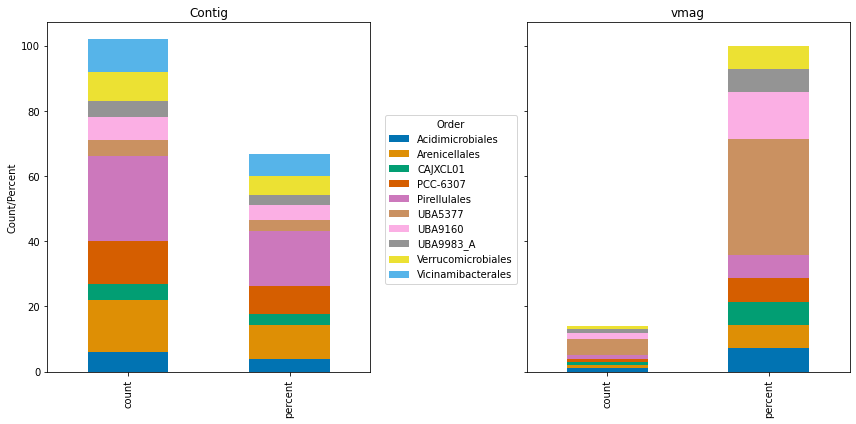

In [41]:
contig_tot = len(contig_hosts)

contig_order_plot['percent'] = contig_order_plot['count']/contig_tot*100
contig_order_plot['type'] = 'contig'

contig_order_plot.reset_index(drop=True, inplace=True)
contig_order_piv = contig_order_plot.pivot_table(columns='order', values=['count','percent'])

vmag_tot = len(vmag_hosts)

vmag_order_plot['percent'] = vmag_order_plot['count']/vmag_tot*100
vmag_order_plot['type'] = 'uninfected'

vmag_order_plot.reset_index(drop=True, inplace=True)
vmag_order_piv = vmag_order_plot.pivot_table(columns='order', values=['count','percent'])

# stacked barplots

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

sns.set_palette("colorblind")

contig_order_piv.plot.bar(stacked = True, ax=axes[0])
axes[0].legend(loc='upper center', bbox_to_anchor=(1.25, 0.75), title='Order')
axes[0].set_ylabel('Count/Percent')
axes[0].set_title('Contig')

vmag_order_piv.plot.bar(stacked=True, ax=axes[1])
axes[1].get_legend().remove()
axes[1].set_ylabel('Count/Percent')
axes[1].set_title('vmag')

plt.tight_layout()